<div align="right"><img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" height="200px" width="25%"></div>

<h1 style="text-align: left; color: #2e6c80;">Actividad Grupal – Análisis e Interpretación de Datos </h1>

<p>
<b>Profesor:</b>  Gustavo Fontana Riera <br>
<b>Fecha de entrega:</b>  05/05/2025 <br>
<b>Alumnos: <br>
    </b>- Erika Samara Alvares Angelim <br>
</p>

---

## Importar librerías

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import json

## ✔️Configurar el entorno

In [94]:
import warnings
warnings.filterwarnings("ignore")

# Mostrar todas las columnas sin truncamiento
pd.set_option('display.max_columns', None)       # Muestra todas las columnas
pd.set_option('display.max_rows', None)          # Muestra todas las filas

pd.options.display.float_format = '{:.8f}'.format
#pd.set_option('display.width', 1000)


# Ocultar warnings
warnings.filterwarnings('ignore')

# Ajustar el ancho del contenedor de Jupyter/Colab:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


plt.style.use('ggplot')

#plt.style.use('fivethirtyeight')
#plt.rcParams['figure.figsize'] = (10, 6)

## Carga los Datos

### Carga los datasets de Airbnb de Madrid

In [95]:
url_listings_madrid = "https://data.insideairbnb.com/spain/comunidad-de-madrid/madrid/2024-12-12/data/listings.csv.gz"
url_calendar_madrid = "https://data.insideairbnb.com/spain/comunidad-de-madrid/madrid/2024-12-12/data/calendar.csv.gz"
url_reviews_madrid = "https://data.insideairbnb.com/spain/comunidad-de-madrid/madrid/2024-12-12/data/reviews.csv.gz"
url_neighbournhood_madrid = "https://data.insideairbnb.com/spain/comunidad-de-madrid/madrid/2024-12-12/visualisations/neighbourhoods.csv" # barrios
url_neighbournhood_geojson_madrid = "https://data.insideairbnb.com/spain/comunidad-de-madrid/madrid/2024-12-12/visualisations/neighbourhoods.geojson"

# Low_memory=False: Carga el archivo completo antes de decidir los tipos de datos de cada columna.
listings_madrid = pd.read_csv(url_listings_madrid, compression='gzip', low_memory=False)
calendar_madrid = pd.read_csv(url_calendar_madrid, compression='gzip', low_memory=False)
reviews_madrid = pd.read_csv(url_reviews_madrid, compression='gzip', low_memory=False)
neighbournhood_madrid = pd.read_csv(url_neighbournhood_madrid, low_memory=False)
neighbournhood_geojson_madrid = pd.read_json(url_neighbournhood_geojson_madrid)


# Carga local de los datasets de Madrid
#listings = pd.read_csv("./datos/madrid/listings.csv.gz", compression='gzip', low_memory=False)
#calendar = pd.read_csv("./datos/madrid/calendar.csv.gz", compression='gzip', low_memory=False)
#reviews = pd.read_csv("./datos/madrid/reviews.csv.gz", compression='gzip', low_memory=False)
#neighbournhood = pd.read_csv("./datos/madrid/neighbourhoods.csv", low_memory=False)



### Carga los datasets de Airbnb de Sevilla

In [96]:

url_listings_sevilla = "https://data.insideairbnb.com/spain/andaluc%C3%ADa/sevilla/2024-12-31/data/listings.csv.gz"
url_calendar_sevilla = "https://data.insideairbnb.com/spain/andaluc%C3%ADa/sevilla/2024-12-31/data/calendar.csv.gz"
url_reviews_sevilla = "https://data.insideairbnb.com/spain/andaluc%C3%ADa/sevilla/2024-12-31/data/reviews.csv.gz"
url_neighbournhood_sevilla = "https://data.insideairbnb.com/spain/andaluc%C3%ADa/sevilla/2024-12-31/visualisations/neighbourhoods.csv" # barrios
url_neighbournhood_geojson_sevilla = "https://data.insideairbnb.com/spain/andaluc%C3%ADa/sevilla/2024-12-31/visualisations/neighbourhoods.geojson"



listings_sevilla = pd.read_csv(url_listings_sevilla, compression='gzip', low_memory=False)
calendar_sevilla = pd.read_csv(url_calendar_sevilla, compression='gzip', low_memory=False)
reviews_sevilla = pd.read_csv(url_reviews_sevilla, compression='gzip', low_memory=False)
neighbournhood_sevilla = pd.read_csv(url_neighbournhood_sevilla, low_memory=False)
neighbournhood_geojson_sevilla = pd.read_json(url_neighbournhood_geojson_sevilla)


# Carga local de los datasets de Sevilla
#listings_sevilla = pd.read_csv("./datos/sevilla/listings.csv.gz", compression='gzip', low_memory=False)
#calendar_sevilla = pd.read_csv("./datos/sevilla/calendar.csv.gz", compression='gzip', low_memory=False)
#reviews_sevilla = pd.read_csv("./datos/sevilla/reviews.csv.gz", compression='gzip', low_memory=False)
#neighbournhood_sevilla = pd.read_csv("./datos/sevilla/neighbourhoods.csv", low_memory=False)


### Carga los datasets de Airbnb de Barcelona

In [97]:
### Carga los datasets de Airbnb de Barcelona (solamente calendar, review, neighbournhood,neighbournhood_geojson )

url_calendar_barcelona = "https://data.insideairbnb.com/spain/catalonia/barcelona/2025-03-05/data/calendar.csv.gz"
url_reviews_barcelona = "https://data.insideairbnb.com/spain/catalonia/barcelona/2025-03-05/data/reviews.csv.gz"
url_neighbournhood_barcelona = "https://data.insideairbnb.com/spain/catalonia/barcelona/2025-03-05/visualisations/neighbourhoods.csv" # barrios
url_neighbournhood_geojson_barcelona = "https://data.insideairbnb.com/spain/catalonia/barcelona/2025-03-05/visualisations/neighbourhoods.geojson"



calendar_barcelona = pd.read_csv(url_calendar_barcelona, compression='gzip', low_memory=False)
reviews_barcelona = pd.read_csv(url_reviews_barcelona, compression='gzip', low_memory=False)
neighbournhood_barcelona = pd.read_csv(url_neighbournhood_barcelona, low_memory=False)
neighbournhood_geojson_barcelona = pd.read_json(url_neighbournhood_geojson_barcelona)


## ETL

### Relacionar los Datasets de Madrid y generar un unico Dataset


In [98]:
# Paso 1: Agrupa los comentarios por listing_id (si hay muchos comentarios por anuncio)
reviews_summary_madrid = reviews_madrid.groupby('listing_id')['comments'] \
    .apply(lambda x: ' || '.join(x.dropna().astype(str))).reset_index()
reviews_summary_madrid.rename(columns={'comments': 'all_comments'}, inplace=True)

# Paso 2: Agrupa el calendario por listing_id para obtener algunas estadísticas agregadas
calendar_summary_madrid = calendar_madrid.groupby('listing_id').agg({
    'price': lambda x: x.mode().iloc[0] if not x.mode().empty else None,  # Precio más común
    'available': lambda x: x.value_counts().idxmax(),                    # Valor más frecuente de disponibilidad
    'minimum_nights': 'mean',
    'maximum_nights': 'mean'
}).reset_index()

calendar_summary_madrid.rename(columns={
    'price': 'typical_price',
    'available': 'most_common_availability',
    'minimum_nights': 'avg_minimum_nights',
    'maximum_nights': 'avg_maximum_nights'
}, inplace=True)

# Paso 3: Unir todo por id / listing_id
airbnb_madrid_full = listings_madrid.merge(calendar_summary_madrid, how='left', left_on='id', right_on='listing_id')
airbnb_madrid_full = airbnb_madrid_full.merge(reviews_summary_madrid, how='left', left_on='id', right_on='listing_id')

# Paso 4: Elimina columnas duplicadas tras los merges
airbnb_madrid_full.drop(columns=['listing_id_x', 'listing_id_y'], errors='ignore', inplace=True)

# Agrega la columna ciudad y almacena en este caso como "Madrid"
airbnb_madrid_full['city'] = 'Madrid'


### Relacionar los Datasets de Sevilla y generar un unico Dataset

In [99]:
# Paso 1: Agrupa los comentarios por listing_id (si hay muchos comentarios por anuncio)
reviews_summary_sevilla = reviews_madrid.groupby('listing_id')['comments'] \
    .apply(lambda x: ' || '.join(x.dropna().astype(str))).reset_index()
reviews_summary_sevilla.rename(columns={'comments': 'all_comments'}, inplace=True)

# Paso 2: Agrupa el calendario por listing_id para obtener algunas estadísticas agregadas
calendar_summary_sevilla = calendar_sevilla.groupby('listing_id').agg({
    'price': lambda x: x.mode().iloc[0] if not x.mode().empty else None,  # Precio más común
    'available': lambda x: x.value_counts().idxmax(),                    # Valor más frecuente de disponibilidad
    'minimum_nights': 'mean',
    'maximum_nights': 'mean'
}).reset_index()

calendar_summary_sevilla.rename(columns={
    'price': 'typical_price',
    'available': 'most_common_availability',
    'minimum_nights': 'avg_minimum_nights',
    'maximum_nights': 'avg_maximum_nights'
}, inplace=True)

# Paso 3: Unir todo por id / listing_id
airbnb_sevilla_full = listings_sevilla.merge(calendar_summary_sevilla, how='left', left_on='id', right_on='listing_id')
airbnb_sevilla_full = airbnb_sevilla_full.merge(reviews_summary_sevilla, how='left', left_on='id', right_on='listing_id')

# Paso 4: Elimina columnas duplicadas tras los merges
airbnb_sevilla_full.drop(columns=['listing_id_x', 'listing_id_y'], errors='ignore', inplace=True)

# Agrega la columna ciudad y almacena en este caso como "Sevilla"
airbnb_sevilla_full['city'] = 'Sevilla'


### UNIÓN FINAL DE MADRID + SEVILLA

In [100]:
# Unir los dos dataframes completos
airbnb_full = pd.concat([airbnb_madrid_full, airbnb_sevilla_full], ignore_index=True)

# Comprobar dimensiones y columnas comunes
print(airbnb_full.shape)
print(airbnb_full['city'].value_counts())


(34793, 81)
city
Madrid     26760
Sevilla     8033
Name: count, dtype: int64


## Seleccionar variables objetivos
- city
- price
- room_type
- bedrooms
- review_scores_rating (valoracion)
- neighbourhood (barrio)

In [101]:
# Creamos un nuevo daframe solamente con las variables objetivo y renombramos las columnas review_scores_rating y neighbourhood_cleansed
# airbnb_variables_objetivos = airbnb_full[[
#     'city',
#     'price',
#     'room_type',
#     'bedrooms',
#     'review_scores_rating',
#     'neighbourhood_cleansed'
# ]].rename(columns={
#     'review_scores_rating': 'valoracion',
#     'neighbourhood_cleansed': 'neighbourhood'
# }).copy()  # .copy() evita problemas de referencia

# Seleccionar y renombrar columnas para la actividad de BBDD Mongo (tendrá las misma variables que el JSON de Guillermo)
airbnb_variables_objetivos = airbnb_full[[
    'id', 
    'name', 
    'host_id', 
    'host_name', 
    'neighbourhood_group_cleansed',
    'neighbourhood_cleansed', 
    'latitude', 
    'longitude', 
    'room_type', 
    'bedrooms', # agruegué    
    'price',
    'minimum_nights', 
    'review_scores_rating', # agregué
    'number_of_reviews', 
    'last_review', 
    'reviews_per_month',
    'calculated_host_listings_count', 
    'availability_365', 
    'number_of_reviews_ltm', 
    'license', 
    'city'
]].rename(columns={
    'neighbourhood_group_cleansed': 'neighbourhood_group',
    'neighbourhood_cleansed': 'neighbourhood',
    'review_scores_rating': 'valoracion',
}).copy()     



# Resetear el índice
airbnb_variables_objetivos = airbnb_variables_objetivos.reset_index(drop=True)

# Verificar las primeras filas
airbnb_variables_objetivos.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,bedrooms,price,minimum_nights,valoracion,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,city
0,21853,Bright and airy room,83531,Abdel,Latina,Cármenes,40.40381000,-3.74130000,Private room,1.00000000,$31.00,4,4.58000000,33,2018-07-15,0.27000000,2,144,0,NaN,Madrid
1,30320,Great Vacational Apartments,130907,Dana,Centro,Sol,40.41476000,-3.70418000,Entire home/apt,1.00000000,NaN,5,4.63000000,172,2022-09-26,0.98000000,3,0,0,NaN,Madrid
2,30959,Beautiful loft in Madrid Center,132883,Angela,Centro,Embajadores,40.41259000,-3.70105000,Entire home/apt,1.00000000,NaN,3,4.38000000,8,2017-05-30,0.07000000,1,0,0,NaN,Madrid
3,40916,Holiday Apartment Madrid Center,130907,Dana,Centro,Universidad,40.42247000,-3.70577000,Entire home/apt,1.00000000,NaN,5,4.65000000,49,2021-12-11,0.29000000,3,0,0,NaN,Madrid
4,62423,MAGIC ARTISTIC HOUSE IN THE CENTER OF MADRID,303845,Arturo,Centro,Justicia,40.41884000,-3.69655000,Private room,1.00000000,$69.00,1,4.64000000,219,2024-11-24,2.73000000,3,332,44,NaN,Madrid


### Verificar tipos de datos

In [102]:
airbnb_variables_objetivos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34793 entries, 0 to 34792
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              34793 non-null  int64  
 1   name                            34793 non-null  object 
 2   host_id                         34793 non-null  int64  
 3   host_name                       34790 non-null  object 
 4   neighbourhood_group             34793 non-null  object 
 5   neighbourhood                   34793 non-null  object 
 6   latitude                        34793 non-null  float64
 7   longitude                       34793 non-null  float64
 8   room_type                       34793 non-null  object 
 9   bedrooms                        32132 non-null  float64
 10  price                           28238 non-null  object 
 11  minimum_nights                  34793 non-null  int64  
 12  valoracion                      

## Tratar los tipos de datos

In [103]:
# Eliminar símbolos no numéricos y convertir a float
airbnb_variables_objetivos['price'] = (
    airbnb_variables_objetivos['price']
    .astype(str)  # Asegurar que sea string
    .str.replace('[$,]', '', regex=True)  # Eliminar "$" y comas
    .astype(float)  # Convertir a float
)

In [104]:
# Filtra las filas donde el precio es negativo
precios_negativos = airbnb_variables_objetivos[airbnb_variables_objetivos['price'] < 0]

# Muestra las primeras filas para revisar los resultados
print(precios_negativos)

Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, bedrooms, price, minimum_nights, valoracion, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365, number_of_reviews_ltm, license, city]
Index: []


## Verifica si hay valores nulos (faltantes)


In [105]:
# Verificar datos faltantes

# Función para tratar valorees nulos
def porcentaje_nulos_totales(df):
    total_celdas = df.size  # Filas * Columnas del DataFrame recibido
    total_nulos = df.isnull().sum().sum()
    return (total_nulos / total_celdas) * 100


# Porcentaje total de valores nulos (usando el DataFrame correcto)
porcentaje_valores_nulos = porcentaje_nulos_totales(airbnb_variables_objetivos)

# Imprimir resultados (corregido)
print(f"""
Airbnb Variables Objetivos:

-----------------------------------------------------------
Suma de valores nulos por columna:
-----------------------------------------------------------
{airbnb_variables_objetivos.isnull().sum()}

-----------------------------------------------------------
Porcentaje de valores nulos por columna:
-----------------------------------------------------------
{((airbnb_variables_objetivos.isnull().sum() / len(airbnb_variables_objetivos)) * 100).round(2).to_string()}

-----------------------------------------------------------
Porcentaje total de valores nulos:
-----------------------------------------------------------
- Porcentaje total de valores nulos: {porcentaje_valores_nulos:.2f}%

-----------------------------------------------------------
Interpretación de Resultados:
-----------------------------------------------------------
Campos críticos (>20% nulos):

Ej: neighborhood_overview (17,875 nulos) → Considerar eliminación o imputación masiva.

Campos con nulos aceptables (<5%):
# Añade aquí columnas de tu dataset con menos del 5% de nulos
Ej: bedrooms ({(2661 / len(airbnb_variables_objetivos)) * 100:.2f}% nulos) → Imputar con la mediana o valor más común (ej: 1 dormitorio).

Columnas 100% nulas:
→ Ej: calendar_updated (34,793 nulos) → Eliminar directamente.

""")



Airbnb Variables Objetivos:

-----------------------------------------------------------
Suma de valores nulos por columna:
-----------------------------------------------------------
id                                    0
name                                  0
host_id                               0
host_name                             3
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
bedrooms                           2661
price                              6555
minimum_nights                        0
valoracion                         6255
number_of_reviews                     0
last_review                        6255
reviews_per_month                  6255
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           24274
city           

## Tratar valores nulos


Critérios para imputación de valores nulos: <br>

El nuevo DataFrame airbnb_variables_objetivos_limpio tendrá:

- price: Imputación estocástica (Mediana + Ruído) en grupo (ciudad + barrio + tipo de habitación).

- bedrooms: Imputado con la mediana global (ej: 1 dormitorio).

- valoracion: Imputado con la media global (ej: 4.7) o categoría "Sin valoración".

### Imputación Estocástica (Mediana + Ruido) en la variable "price"

Imputa valores nulos en 'price' aplicando una estrategia jerárquica: primero usa la mediana del grupo (ciudad, barrio, tipo de habitación) con ruido estocástico (IQR); si el grupo carece de datos, recurre progresivamente a la mediana ciudad-barrio, ciudad-tipo de habitación o global.

In [106]:
# Función de imputación de precios
def impute_price(group):
    """
    Imputa valores nulos en 'price' usando:
    - Mediana + ruido del grupo (city, neighbourhood, room_type)
    - Fallback a medianas jerárquicas si el grupo está vacío
    """
    try:
        # Caso 1: Grupo tiene datos -> Imputación estocástica (IQR)
        if group['price'].notna().sum() > 0:
            median = group['price'].median()
            q1 = group['price'].quantile(0.25)
            q3 = group['price'].quantile(0.75)
            iqr = q3 - q1

            # Generar ruido controlado
            if iqr == 0:
                noise = 0
            else:
                noise = np.random.uniform(-0.5 * iqr, 0.5 * iqr)

            # Imputar precio con ruido, asegurando que no sea negativo ni cero
            imputed_price = median + noise
            if imputed_price <= 0:
                imputed_price = median  # Si el precio imputado es 0 o negativo, usar la mediana

            group['price'] = group['price'].fillna(imputed_price)
            return group

        # Caso 2: Grupo vacío -> Fallback jerárquico
        city = group['city'].iloc[0] if group['city'].notna().any() else None
        neighbourhood = group['neighbourhood'].iloc[0] if group['neighbourhood'].notna().any() else None
        room_type = group['room_type'].iloc[0] if group['room_type'].notna().any() else None

        # Jerarquía de fallbacks
        fallback_median = None

        # 1. city + neighbourhood
        if city and neighbourhood:
            mask = (airbnb_variables_objetivos['city'] == city) & \
                   (airbnb_variables_objetivos['neighbourhood'] == neighbourhood)
            fallback_median = airbnb_variables_objetivos.loc[mask, 'price'].median()

        # 2. city + room_type
        if pd.isna(fallback_median) and city and room_type:
            mask = (airbnb_variables_objetivos['city'] == city) & \
                   (airbnb_variables_objetivos['room_type'] == room_type)
            fallback_median = airbnb_variables_objetivos.loc[mask, 'price'].median()

        # 3. Mediana global
        if pd.isna(fallback_median):
            fallback_median = airbnb_variables_objetivos['price'].median()

        group['price'] = fallback_median
        return group

    except Exception as e:
        print(f"Error en grupo {group.name}: {str(e)}")
        return group


########################################
# EJECUCIÓN Y VALIDACIÓN
########################################

# 1. Resetear índice del DataFrame original (crítico para groupby)
airbnb_variables_objetivos = airbnb_variables_objetivos.reset_index(drop=True)

# 2. Aplicar imputación y guardar en un nuevo dataframe
airbnb_variables_objetivos_limpio = (
    airbnb_variables_objetivos
    .groupby(['city', 'neighbourhood', 'room_type'], group_keys=False)  # Agrupar por estas columnas
    .apply(impute_price)  # Aplicar la función de imputación
    .reset_index(drop=True)  # Resetear los índices para tener un dataframe limpio
)

# Ahora, el dataframe limpio con los valores imputados está en airbnb_variables_objetivos_limpio


In [107]:
# Filtra las filas donde el precio es negativo
precios_negativos = airbnb_variables_objetivos_limpio[airbnb_variables_objetivos['price'] < 0]

# Muestra las primeras filas para revisar los resultados
print(precios_negativos)

Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, bedrooms, price, minimum_nights, valoracion, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365, number_of_reviews_ltm, license, city]
Index: []


### Imputación de valores en las variables "bedrooms" y "valoracion"

In [108]:
# 1. Imputar 'bedrooms' (mediana global)
# --------------------------------------
median_bedrooms = airbnb_variables_objetivos_limpio['bedrooms'].median()
airbnb_variables_objetivos_limpio['bedrooms'] = airbnb_variables_objetivos_limpio['bedrooms'].fillna(median_bedrooms)

# 2. Imputar 'valoracion' (media global o categoría)
# -------------------------------------------------
mean_valoracion = airbnb_variables_objetivos_limpio['valoracion'].mean()
airbnb_variables_objetivos_limpio['valoracion'] = airbnb_variables_objetivos_limpio['valoracion'].fillna(mean_valoracion)

# Opcional: Si prefieres categoría "Sin valoración"
#airbnb_variables_objetivos_limpio['valoracion'] = airbnb_variables_objetivos_limpio['valoracion'].fillna('Sin valoración')

# 3. Verificar que no queden nulos
# --------------------------------
print("Nulos restantes en el DataFrame limpio:")
print(airbnb_variables_objetivos_limpio.isnull().sum())

Nulos restantes en el DataFrame limpio:
id                                    0
name                                  0
host_id                               0
host_name                             3
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
bedrooms                              0
price                                 0
minimum_nights                        0
valoracion                            0
number_of_reviews                     0
last_review                        6255
reviews_per_month                  6255
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           24274
city                                  0
dtype: int64


### Verifica la distribución de las variables numéricas después de la imputación

In [109]:
# Para 'price'
print("\nDistribución de 'price' antes vs después:")
print("Original:", airbnb_variables_objetivos['price'].describe().round(2))
print("Limpio:", airbnb_variables_objetivos_limpio['price'].describe().round(2))

# Para 'valoracion'
print("\nDistribución de 'valoracion' antes vs después:")
print("Original:", airbnb_variables_objetivos['valoracion'].describe().round(2))
print("Limpio:", airbnb_variables_objetivos_limpio['valoracion'].describe().round(2))


Distribución de 'price' antes vs después:
Original: count   28238.00000000
mean      150.08000000
std       460.10000000
min         8.00000000
25%        69.00000000
50%       103.00000000
75%       150.00000000
max     21347.00000000
Name: price, dtype: float64
Limpio: count   34793.00000000
mean      137.51000000
std       415.74000000
min         8.00000000
25%        62.14000000
50%        99.43000000
75%       143.22000000
max     21347.00000000
Name: price, dtype: float64

Distribución de 'valoracion' antes vs después:
Original: count   28538.00000000
mean        4.66000000
std         0.45000000
min         0.00000000
25%         4.57000000
50%         4.77000000
75%         4.92000000
max         5.00000000
Name: valoracion, dtype: float64
Limpio: count   34793.00000000
mean        4.66000000
std         0.41000000
min         0.00000000
25%         4.63000000
50%         4.70000000
75%         4.89000000
max         5.00000000
Name: valoracion, dtype: float64


In [110]:
# Verificar los valores únicos de la columna 'city'
print(airbnb_variables_objetivos_limpio['city'].unique())


['Madrid' 'Sevilla']


### Seleccionar solamente alquilleres menores que 1000 usd

Evaluar si realmente tiene sentido seleccionar solamente los airbnb que tengan precio menor que 1000 USD una vez que ya apliqué el Rango Intercuartílico (IRQ) en la fase de limpieza y tratamiento de los datos en las celdas anteriores. Caso no sea necesario bastaba comentar la linea.

In [111]:
#airbnb_variables_objetivos_limpio = airbnb_variables_objetivos_limpio[airbnb_variables_objetivos_limpio['price'] < 1000]
airbnb_variables_objetivos_limpio.shape

(34793, 21)

## Mini EDA

#### Estadistíca Descriptiva General

In [112]:
airbnb_variables_objetivos_limpio.describe().round(2)

,id,host_id,latitude,longitude,bedrooms,price,minimum_nights,valoracion,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,34793.00000000,34793.00000000,34793.00000000,34793.00000000,34793.00000000,34793.00000000,34793.00000000,34793.00000000,34793.00000000,28538.00000000,34793.00000000,34793.00000000,34793.00000000
mean,580673545863899392.00000000,239403967.71000001,39.72000000,-4.22000000,1.43000000,137.51000000,7.10000000,4.66000000,53.97000000,1.87000000,30.91000000,168.33000000,15.40000000
std,519327446769484352.00000000,201279621.66999999,1.28000000,0.97000000,0.96000000,415.74000000,27.57000000,0.41000000,95.68000000,1.93000000,72.38000000,129.79000000,22.23000000
min,21853.00000000,7952.00000000,37.32000000,-6.01000000,0.00000000,8.00000000,1.00000000,0.00000000,0.00000000,0.01000000,1.00000000,0.00000000,0.00000000
25%,34961800.00000000,46073005.00000000,40.38000000,-3.74000000,1.00000000,62.14000000,1.00000000,4.63000000,2.00000000,0.41000000,1.00000000,41.00000000,0.00000000
50%,718842544942718208.00000000,189499794.00000000,40.41000000,-3.70000000,1.00000000,99.43000000,2.00000000,4.70000000,14.00000000,1.26000000,3.00000000,163.00000000,5.00000000
75%,1086213204385037184.00000000,434208714.00000000,40.43000000,-3.69000000,2.00000000,143.22000000,3.00000000,4.89000000,62.00000000,2.77000000,18.00000000,294.00000000,23.00000000
max,1322539054118836992.00000000,669510462.00000000,40.54000000,-3.55000000,25.00000000,21347.00000000,1125.00000000,5.00000000,1228.00000000,41.81000000,343.00000000,365.00000000,446.00000000


#### Estadisticas Descriptiva por Ciudad y Valoración General

In [113]:
#Estadisticas Descriptiva por Ciudad
airbnb_variables_objetivos_limpio.groupby('city')['price'].describe().round(2)


,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
Madrid,26760.00000000,122.05000000,372.31000000,8.00000000,57.00000000,92.00000000,129.00000000,21347.00000000
Sevilla,8033.00000000,189.00000000,532.37000000,10.00000000,90.00000000,128.96000000,179.00000000,9999.00000000


#### Estadistica Descriptiva por Ciudad y Barrio

In [114]:
airbnb_variables_objetivos_limpio.groupby(['city', 'neighbourhood'])['price'].describe().round(2)


count  \
city    neighbourhood                                                      
Madrid  Abrantes                                             73.00000000   
        Acacias                                             257.00000000   
        Adelfas                                             107.00000000   
        Aeropuerto                                           10.00000000   
        Aguilas                                              60.00000000   
        Alameda de Osuna                                     44.00000000   
        Almagro                                             247.00000000   
        Almenara                                            205.00000000   
        Almendrales                                         119.00000000   
        Aluche                                               85.00000000   
        Ambroz                                               19.00000000   
        Amposta                                              22.00000000   
        Apostol Santiago                                     33.00000000   
        Arapiles                                            264.00000000   
        Aravaca                                              51.00000000   
        Arcos                                                52.00000000   
        Argüelles                                           370.00000000   
        Atalaya                                               1.00000000   
        Atocha                                               51.00000000   
        Bellas Vistas                                       254.00000000   
        Berruguete                                          217.00000000   
        Buenavista                                           80.00000000   
        Butarque                                             33.00000000   
        Campamento                                           35.00000000   
        Canillas                                            153.00000000   
        Canillejas                                          115.00000000   
        Casa de Campo                                        87.00000000   
        Casco Histórico de Barajas                           69.00000000   
        Casco Histórico de Vallecas                         124.00000000   
        Casco Histórico de Vicálvaro                         71.00000000   
        Castellana                                          215.00000000   
        Castilla                                             89.00000000   
        Castillejos                                         310.00000000   
        Chopera                                             181.00000000   
        Ciudad Jardín                                       124.00000000   
        Ciudad Universitaria                                 86.00000000   
        Colina                                               31.00000000   
        Comillas                                            175.00000000   
        Concepción                                          121.00000000   
        Corralejos                                           15.00000000   
        Cortes                                             1090.00000000   
        Costillares                                          52.00000000   
        Cuatro Caminos                                      431.00000000   
        Cuatro Vientos                                        7.00000000   
        Cármenes                                             71.00000000   
        Delicias                                            238.00000000   
        El Goloso                                            16.00000000   
        El Pardo                                              4.00000000   
        El Plantío                                           17.00000000   
        El Viso                                              97.00000000   
        Embajadores                                        2962.00000000   
        Entrevías                      

#### Estadística descriptiva del precio
Obtener resumen estadístico de la columna "price"

In [115]:
#print("Estadística descriptiva de precios:")
airbnb_variables_objetivos_limpio['price'].describe().round(2)


count   34793.00000000
mean      137.51000000
std       415.74000000
min         8.00000000
25%        62.14000000
50%        99.43000000
75%       143.22000000
max     21347.00000000
Name: price, dtype: float64

#### Análisis de Precios por Tipo de Alojamiento en Sevilla y Madrid

In [116]:
# Calcular estadísticas por tipo de alojamiento para Sevilla y Madrid
grouped_sevilla = airbnb_variables_objetivos_limpio[airbnb_variables_objetivos_limpio['city'] == 'Sevilla'].groupby('room_type')['price'].agg(['mean', 'median', 'std', 'count']).reset_index()
grouped_madrid = airbnb_variables_objetivos_limpio[airbnb_variables_objetivos_limpio['city'] == 'Madrid'].groupby('room_type')['price'].agg(['mean', 'median', 'std', 'count']).reset_index()

# Redondear los valores a dos decimales
grouped_sevilla = grouped_sevilla.round({'mean': 2, 'median': 2, 'std': 2})
grouped_madrid = grouped_madrid.round({'mean': 2, 'median': 2, 'std': 2})

# Mostrar resultados
print("\nEstadísticas de precios por tipo de alojamiento en Sevilla:")
print(grouped_sevilla)

print("\nEstadísticas de precios por tipo de alojamiento en Madrid:")
print(grouped_madrid)



Estadísticas de precios por tipo de alojamiento en Sevilla:
         room_type         mean       median          std  count
0  Entire home/apt 202.44000000 137.00000000 552.05000000   6820
1       Hotel room 202.63000000 155.00000000 121.53000000     23
2     Private room 110.67000000  59.68000000 399.30000000   1180
3      Shared room 230.30000000  44.00000000 405.96000000     10

Estadísticas de precios por tipo de alojamiento en Madrid:
         room_type         mean       median          std  count
0  Entire home/apt 151.19000000 111.00000000 446.11000000  17455
1       Hotel room 209.57000000 144.41000000 224.86000000     89
2     Private room  64.90000000  48.67000000 138.81000000   8864
3      Shared room  94.24000000  33.79000000 211.73000000    352


In [117]:
# Filtra las filas donde el precio es negativo
precios_negativos = airbnb_variables_objetivos_limpio[airbnb_variables_objetivos_limpio['price'] < 0]

# Muestra las primeras filas para revisar los resultados
print(precios_negativos)


Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, bedrooms, price, minimum_nights, valoracion, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365, number_of_reviews_ltm, license, city]
Index: []


#### Cálculo de la correlación entre el número de habitaciones y el precio en Sevilla y Madrid

In [118]:
# Matriz de correlación entre precio y número de habitaciones para Sevilla y Madrid
# Filtramos los datos por ciudad y calculamos la correlación entre 'price' y 'bedrooms' para cada ciudad

# Filtrar los datos para Sevilla y Madrid
df_sevilla = airbnb_variables_objetivos_limpio[airbnb_variables_objetivos_limpio['city'] == 'Sevilla']
df_madrid = airbnb_variables_objetivos_limpio[airbnb_variables_objetivos_limpio['city'] == 'Madrid']

# Correlación para Sevilla
correlation_sevilla = df_sevilla[['price', 'bedrooms']].corr().loc['bedrooms', 'price']
print(f"\nCorrelación entre número de habitaciones y precio en Sevilla: {correlation_sevilla:.2f}")

# Correlación para Madrid
correlation_madrid = df_madrid[['price', 'bedrooms']].corr().loc['bedrooms', 'price']
print(f"Correlación entre número de habitaciones y precio en Madrid: {correlation_madrid:.2f}")



Correlación entre número de habitaciones y precio en Sevilla: 0.10
Correlación entre número de habitaciones y precio en Madrid: 0.10


#### Tabla de correlación

¿Qué revelan estas tablas?

- Diferencias entre Ciudades:
- ¿La relación precio-valoración es igual en ambas ciudades?
- ¿Cómo afecta el número de dormitorios al precio en cada ubicación?<br>

Patrones Ocultos:

- ¿Los tipos de habitación impactan diferente en cada ciudad?
- ¿Existen correlaciones contraintuitivas?

In [119]:

# Filtrar datos por ciudad
df_madrid = airbnb_variables_objetivos_limpio[airbnb_variables_objetivos_limpio['city'] == 'Madrid']
df_sevilla = airbnb_variables_objetivos_limpio[airbnb_variables_objetivos_limpio['city'] == 'Sevilla']

# Función para procesar cada ciudad
def calcular_correlaciones_ciudad(df, nombre_ciudad):
    # Preparar datos y codificar room_type
    df_encoded = pd.get_dummies(df[['price', 'bedrooms', 'room_type', 'valoracion']],
                              columns=['room_type'])

    # Calcular matriz de correlación
    corr_matrix = df_encoded.corr(numeric_only=True).round(2)

    # Correlación específica valoracion-price
    corr_val_precio = corr_matrix.loc['valoracion', 'price']

    # Imprimir resultados
    print(f"\n🔵 {nombre_ciudad} 🔵")
    print(f"Correlación Valoración-Precio: {corr_val_precio:.2f}")
    print("\nMatriz de Correlación Completa:")

    return corr_matrix.style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1)\
                      .set_caption(f"Tabla: {nombre_ciudad}")\
                      .format("{:.2f}", na_rep="-")

# Calcular y mostrar para Madrid
tabla_madrid = calcular_correlaciones_ciudad(df_madrid, "Madrid")
display(tabla_madrid)

# Calcular y mostrar para Sevilla
tabla_sevilla = calcular_correlaciones_ciudad(df_sevilla, "Sevilla")
display(tabla_sevilla)


🔵 Madrid 🔵
Correlación Valoración-Precio: 0.01

Matriz de Correlación Completa:


,price,bedrooms,valoracion,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
price,1.00,0.10,0.01,0.11,0.01,-0.11,-0.01
bedrooms,0.10,1.00,-0.01,0.18,-0.02,-0.17,-0.05
valoracion,0.01,-0.01,1.00,-0.02,-0.00,0.03,-0.04
room_type_Entire home/apt,0.11,0.18,-0.02,1.00,-0.08,-0.96,-0.16
room_type_Hotel room,0.01,-0.02,-0.00,-0.08,1.00,-0.04,-0.01
room_type_Private room,-0.11,-0.17,0.03,-0.96,-0.04,1.00,-0.08
room_type_Shared room,-0.01,-0.05,-0.04,-0.16,-0.01,-0.08,1.00



🔵 Sevilla 🔵
Correlación Valoración-Precio: -0.01

Matriz de Correlación Completa:


,price,bedrooms,valoracion,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
price,1.00,0.10,-0.01,0.06,0.00,-0.06,0.00
bedrooms,0.10,1.00,0.07,0.20,-0.03,-0.20,-0.02
valoracion,-0.01,0.07,1.00,0.04,-0.01,-0.04,0.02
room_type_Entire home/apt,0.06,0.20,0.04,1.00,-0.13,-0.98,-0.08
room_type_Hotel room,0.00,-0.03,-0.01,-0.13,1.00,-0.02,-0.00
room_type_Private room,-0.06,-0.20,-0.04,-0.98,-0.02,1.00,-0.01
room_type_Shared room,0.00,-0.02,0.02,-0.08,-0.00,-0.01,1.00


##### Análisis Tabla de Correlación Madrid

**Interpretación Técnica de la Matriz de Correlación (Madrid):**

La matriz de correlación muestra las relaciones lineales entre las variables analizadas en los alojamientos de Airbnb en Madrid. A continuación, se destacan los hallazgos clave:

---

**1. Relación Precio-Valoración**  
- **Correlación: 0.01**  
  - **Interpretación:** No existe una relación lineal significativa entre el precio y la valoración.  
  - **Implicación:** Los precios más altos *no garantizan* mejores valoraciones, y viceversa.  
  - **Posible causa:** Factores como la ubicación, servicios adicionales o atención del anfitrión podrían influir más en las valoraciones que el precio.

---

**2. Precio vs Tipo de Habitación**  
- **Entire home/apt (Correlación: 0.11)**  
  - Las propiedades completas tienen una ligera tendencia a ser más caras.  
- **Private room (Correlación: -0.11)**  
  - Las habitaciones privadas muestran una correlación negativa débil con el precio.  
- **Relación inversa (Entire home/apt vs Private room: -0.96)**  
  - **Interpretación:** Existe una correlación negativa casi perfecta entre estos tipos de habitación, lo que confirma que son categorías mutuamente excluyentes (un alojamiento no puede ser ambos).  

---

**3. Dormitorios vs Precio**  
- **Correlación: 0.10**  
  - **Hallazgo:** Aunque positiva, la relación entre el número de dormitorios y el precio es muy débil.  
  - **Insight:** En Madrid, el tamaño de la propiedad (medido en dormitorios) *no es un factor determinante* en el precio. Podrían influir más características como la ubicación o el diseño.  

---

**4. Valoración vs Otras Variables**  
- **Todas las correlaciones cercanas a 0** (entre -0.04 y 0.03).  
  - **Conclusión:** La valoración no está relacionada linealmente con:  
    - Precio.  
    - Número de dormitorios.  
    - Tipo de habitación.  
  - **Recomendación:** Investigar variables no analizadas (ej: limpieza, comunicación del anfitrión, amenities) para entender los drivers de las valoraciones.  

---

**5. Relaciones entre Tipos de Habitación**  
- **Entire home/apt vs Private room: -0.96**  
  - **Validación técnica:** Confirma que las variables dummy están bien construidas (un alojamiento solo pertenece a una categoría).  

---



**Conclusiones para el Informe:**  
1. **Estrategia de precios:** En Madrid, el tipo de habitación (Entire home/apt) justifica precios ligeramente más altos, pero no existen diferencias significativas basadas en dormitorios.  
2. **Valoraciones:** Se requieren análisis cualitativos (ej: texto de reseñas) para identificar factores no cuantificados en esta matriz.  
3. **Segmentación:** La alta correlación inversa entre tipos de habitación sugiere que los huéspedes eligen entre "propiedades completas" o "habitaciones privadas", no ambas.  

**Nota:** Correlación ≠ Causalidad. Se recomienda complementar con análisis de regresión para identificar predictores significativos del precio.  

---

Este análisis proporciona una base cuantitativa para decisiones estratégicas en pricing y mejora de la experiencia del huésped en Madrid.

##### Análisis Tabla de Correlación Sevilla

**Interpretación Técnica de la Matriz de Correlación (Sevilla):**

La matriz de correlación revela las relaciones lineales entre variables clave en los alojamientos de Airbnb en Sevilla. A continuación, se desglosan los hallazgos principales:

---

**1. Relación Precio-Valoración**  
- **Correlación: -0.01**  
  - **Interpretación:** Al igual que en Madrid, no existe una relación lineal significativa entre precio y valoración.  
  - **Implicación:** Los precios altos no garantizan mejores valoraciones, y las valoraciones altas no están vinculadas a precios elevados.  
  - **Posible causa:** Factores no analizados (ej: calidad del servicio, ubicación exacta, limpieza) podrían influir más en las valoraciones.

---

**2. Precio vs Tipo de Habitación**  
- **Entire home/apt (Correlación: 0.06)**  
  - Las propiedades completas tienen una correlación positiva muy débil con el precio, similar a Madrid pero menos pronunciada.  
- **Private room (Correlación: -0.06)**  
  - Ligera tendencia a precios más bajos en habitaciones privadas.  
- **Relación inversa (Entire home/apt vs Private room: -0.98)**  
  - **Interpretación:** Correlación negativa casi perfecta, confirmando la exclusividad mutua de las categorías (un alojamiento no puede ser ambas cosas).  

---

**3. Dormitorios vs Precio**  
- **Correlación: 0.10**  
  - **Hallazgo:** Igual que en Madrid, el número de dormitorios tiene un impacto mínimo en el precio.  
  - **Insight:** En Sevilla, el tamaño de la propiedad no es un driver principal de precio. La ubicación o amenities podrían ser más relevantes.  

---

**4. Valoración vs Otras Variables**  
- **Todas las correlaciones cercanas a 0** (entre -0.04 y 0.07).  
  - **Conclusión:** La valoración no está ligada linealmente a:  
    - Precio.  
    - Dormitorios.  
    - Tipo de habitación.  
  - **Recomendación:** Analizar variables cualitativas (ej: comentarios de reseñas) para identificar drivers ocultos.  

---

**5. Relaciones entre Tipos de Habitación**  
- **Entire home/apt vs Private room: -0.98**  
  - **Validación técnica:** Coherencia con la codificación dummy, donde un alojamiento solo puede pertenecer a una categoría.  

---

**Diferencias Clave vs Madrid**  
1. **Dormitorios y Entire home/apt (Correlación: 0.20 en Sevilla vs 0.18 en Madrid):**  
   - En Sevilla, las propiedades completas tienden ligeramente a tener más dormitorios, pero la relación sigue siendo débil.  
2. **Valoración y Dormitorios (Correlación: 0.07 en Sevilla vs -0.01 en Madrid):**  
   - Aunque insignificante, sugiere que en Sevilla *podría* haber una mínima tendencia a valorar mejor propiedades con más dormitorios.  

---



### **Conclusiones para el Informe:**  
1. **Estrategia de precios:** En Sevilla, el tipo de habitación influye menos en el precio que en Madrid. Las propiedades completas no justifican precios significativamente más altos.  
2. **Valoraciones:** Al igual que en Madrid, se requieren análisis no lineales o cualitativos para entender los motivos detrás de las puntuaciones.  
3. **Segmentación de mercado:** La elección entre "propiedad completa" y "habitación privada" es igualmente excluyente en ambas ciudades, pero en Sevilla la correlación precio-tipo es aún más tenue.  

**Recomendación final:** Realizar un estudio comparativo entre ciudades para identificar si las diferencias en correlaciones reflejan variaciones culturales o de mercado.  

---

Este análisis proporciona una base cuantitativa para optimizar estrategias comerciales en Sevilla, destacando la necesidad de enfoques complementarios para entender las valoraciones.

### Visualizaciones

#### Grafico Comparativo

#### Distribución del precio por tipo de alojamiento y ciudad

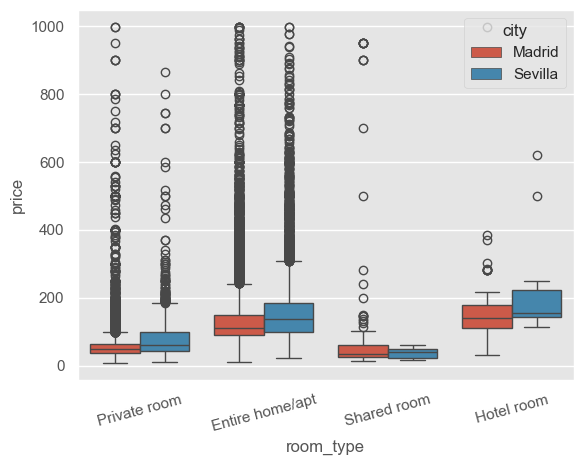

In [120]:

# Filtra los precios que son menores a 1000 euros
airbnb_variables_objetivos_limpio_filtrado = airbnb_variables_objetivos_limpio[airbnb_variables_objetivos_limpio['price'] < 1000]

# Grafico comparativo de distribución del precio por alojamiento y ciudad
sns.boxplot(data=airbnb_variables_objetivos_limpio_filtrado, x='room_type', y='price', hue='city')
plt.title = ('Distribución del precio por tipo de alojamiento y ciudad')
plt.xticks(rotation=15)
plt.savefig('boxplot_filtrado.png')
plt.show()


##

##


#### Estadistica Robusta (Pepe)
Aunque ya se aplicó una limpieza de precios mediante el rango intercuartílico (IQR), se ha decidido conservar esta gráfica como herramienta **visual de validación**. Su objetivo es comparar medidas robustas (mediana e IQR) frente a medidas sensibles a valores extremos (media y desviación estándar) para verificar si los precios altos que persisten son esperables, especialmente en ciudades como Madrid o Sevilla.<br>

No se utilizará esta gráfica como criterio adicional de filtrado, sino como **respaldo visual y exploratorio** del comportamiento de los precios por ciudad.

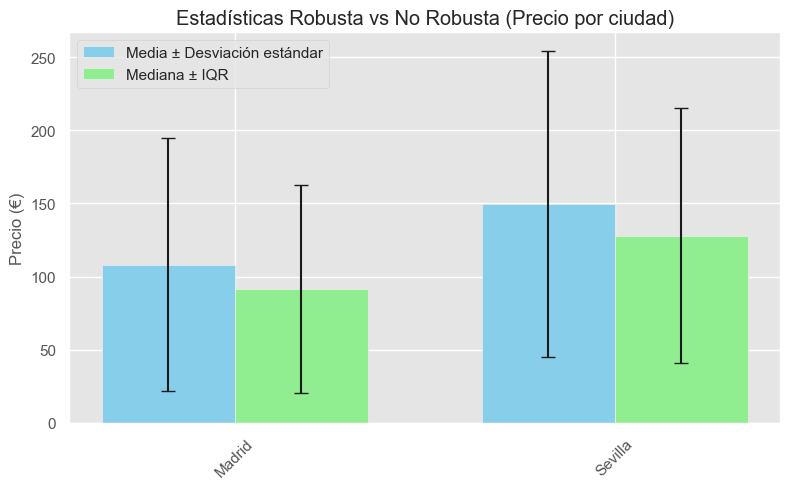

In [121]:
# 1. Filtrar los precios menores a 1000
airbnb_variables_objetivos_limpio_filtrado = airbnb_variables_objetivos_limpio[airbnb_variables_objetivos_limpio['price'] < 1000]

# 2. Agrupa por ciudad y calcula estadísticas básicas
stats = airbnb_variables_objetivos_limpio_filtrado.groupby('city')['price'].agg(['mean', 'std', 'median'])

# 3. Calcula los cuartiles y el rango intercuartílico (IQR)
q1 = airbnb_variables_objetivos_limpio_filtrado.groupby('city')['price'].quantile(0.25)
q3 = airbnb_variables_objetivos_limpio_filtrado.groupby('city')['price'].quantile(0.75)
stats['iqr'] = q3 - q1

# 4. Prepara las posiciones para las barras
cities = stats.index.tolist()
x = range(len(cities))
width = 0.35

# 5. Dibuja barras con barras de error
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar([i - width/2 for i in x],
       stats['mean'],
       width,
       yerr=stats['std'],
       capsize=5,
       label='Media ± Desviación estándar',
       color='skyblue')
ax.bar([i + width/2 for i in x],
       stats['median'],
       width,
       yerr=stats['iqr'],
       capsize=5,
       label='Mediana ± IQR',
       color='lightgreen')

# 6. Ajustes finales
ax.set_xticks(x)
ax.set_xticklabels(cities, rotation=45)
ax.set_title('Estadísticas Robusta vs No Robusta (Precio por ciudad)')
ax.set_ylabel('Precio (€)')
ax.legend()
plt.tight_layout()
plt.savefig('EstadisticaRVSnR.png')
plt.show()


#### Análisis de Correlación entre Variables de Alojamiento en Sevilla y Madrid

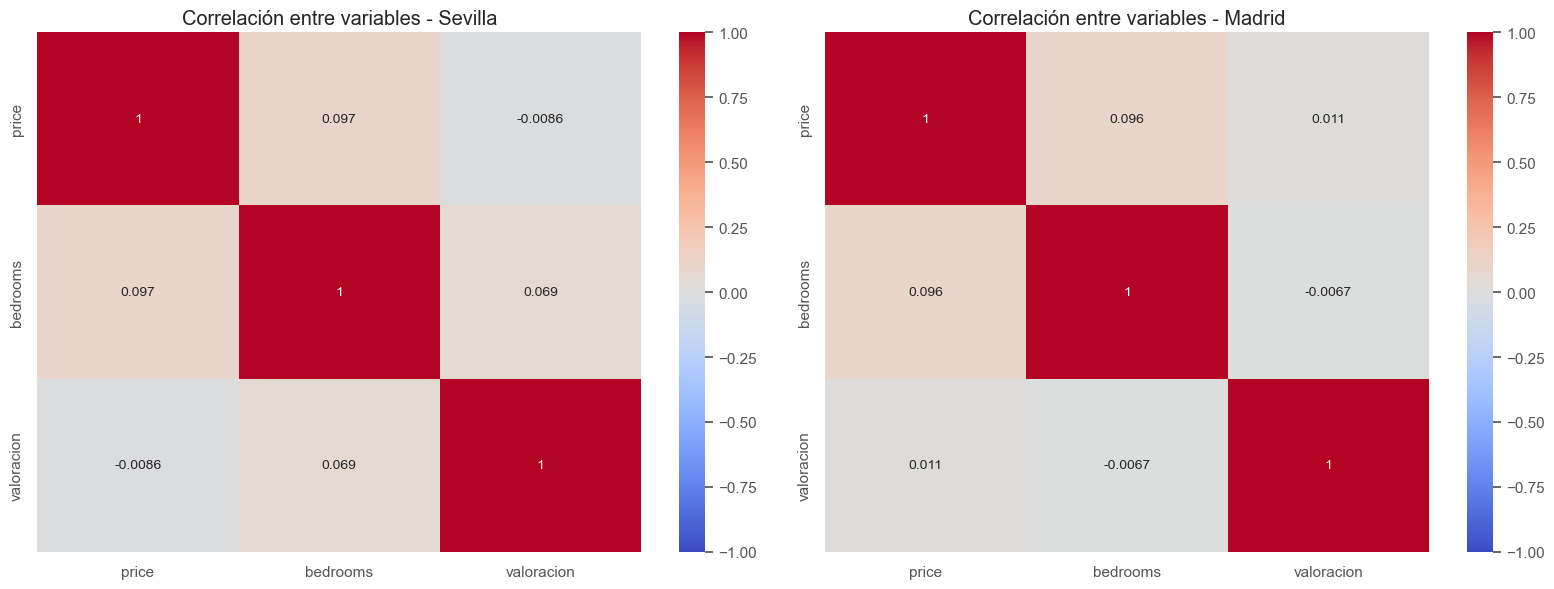

Series([], dtype: float64)
Series([], dtype: float64)


In [122]:

# Filtrar los datos para Sevilla y Madrid
sevilla_df = airbnb_variables_objetivos_limpio[airbnb_variables_objetivos_limpio['city'] == 'Sevilla']
madrid_df = airbnb_variables_objetivos_limpio[airbnb_variables_objetivos_limpio['city'] == 'Madrid']

# Crear matriz de correlación para Sevilla
corr_sevilla = sevilla_df[['price', 'bedrooms', 'valoracion']].corr()

# Crear matriz de correlación para Madrid
corr_madrid = madrid_df[['price', 'bedrooms', 'valoracion']].corr()



# Crear una figura con dos subgráficas (2 filas, 1 columna)
plt.figure(figsize=(16, 6))

# Primer gráfico: Correlación Sevilla
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, 1er gráfico
sns.heatmap(corr_sevilla,
            annot=True,
            cmap='coolwarm',
            vmin=-1,
            vmax=1)
plt.gca().set_title("Correlación entre variables - Sevilla")

# Segundo gráfico: Correlación Madrid
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, 2do gráfico
sns.heatmap(corr_madrid,
            annot=True,
            cmap='coolwarm',
            vmin=-1,
            vmax=1)
plt.gca().set_title("Correlación entre variables - Madrid")

# Ajustar el espacio entre los gráficos
plt.tight_layout()

# Mostrar las gráficas
plt.show()

#### Identificar pares de variables con alta correlación (umbral > 0.7 o < -0.7)

# Filtrar pares con alta correlación (umbral > 0.7 o < -0.7)
# Madrid
correlated_pairs_madrid = corr_madrid.abs().unstack().sort_values(ascending=False)
high_correlation_pairs_madrid = correlated_pairs_madrid[(correlated_pairs_madrid > 0.7) & (correlated_pairs_madrid < 1.0)]
print(high_correlation_pairs_madrid)

#Sevilla
correlated_pairs_sevilla = corr_sevilla.abs().unstack().sort_values(ascending=False)
high_correlation_pairs_sevilla = correlated_pairs_sevilla[(correlated_pairs_sevilla > 0.7) & (correlated_pairs_sevilla < 1.0)]
print(high_correlation_pairs_sevilla)




#### Visualizar la distribución de variables clave en el dataset (airbnb_variables_objetivos_limpio)



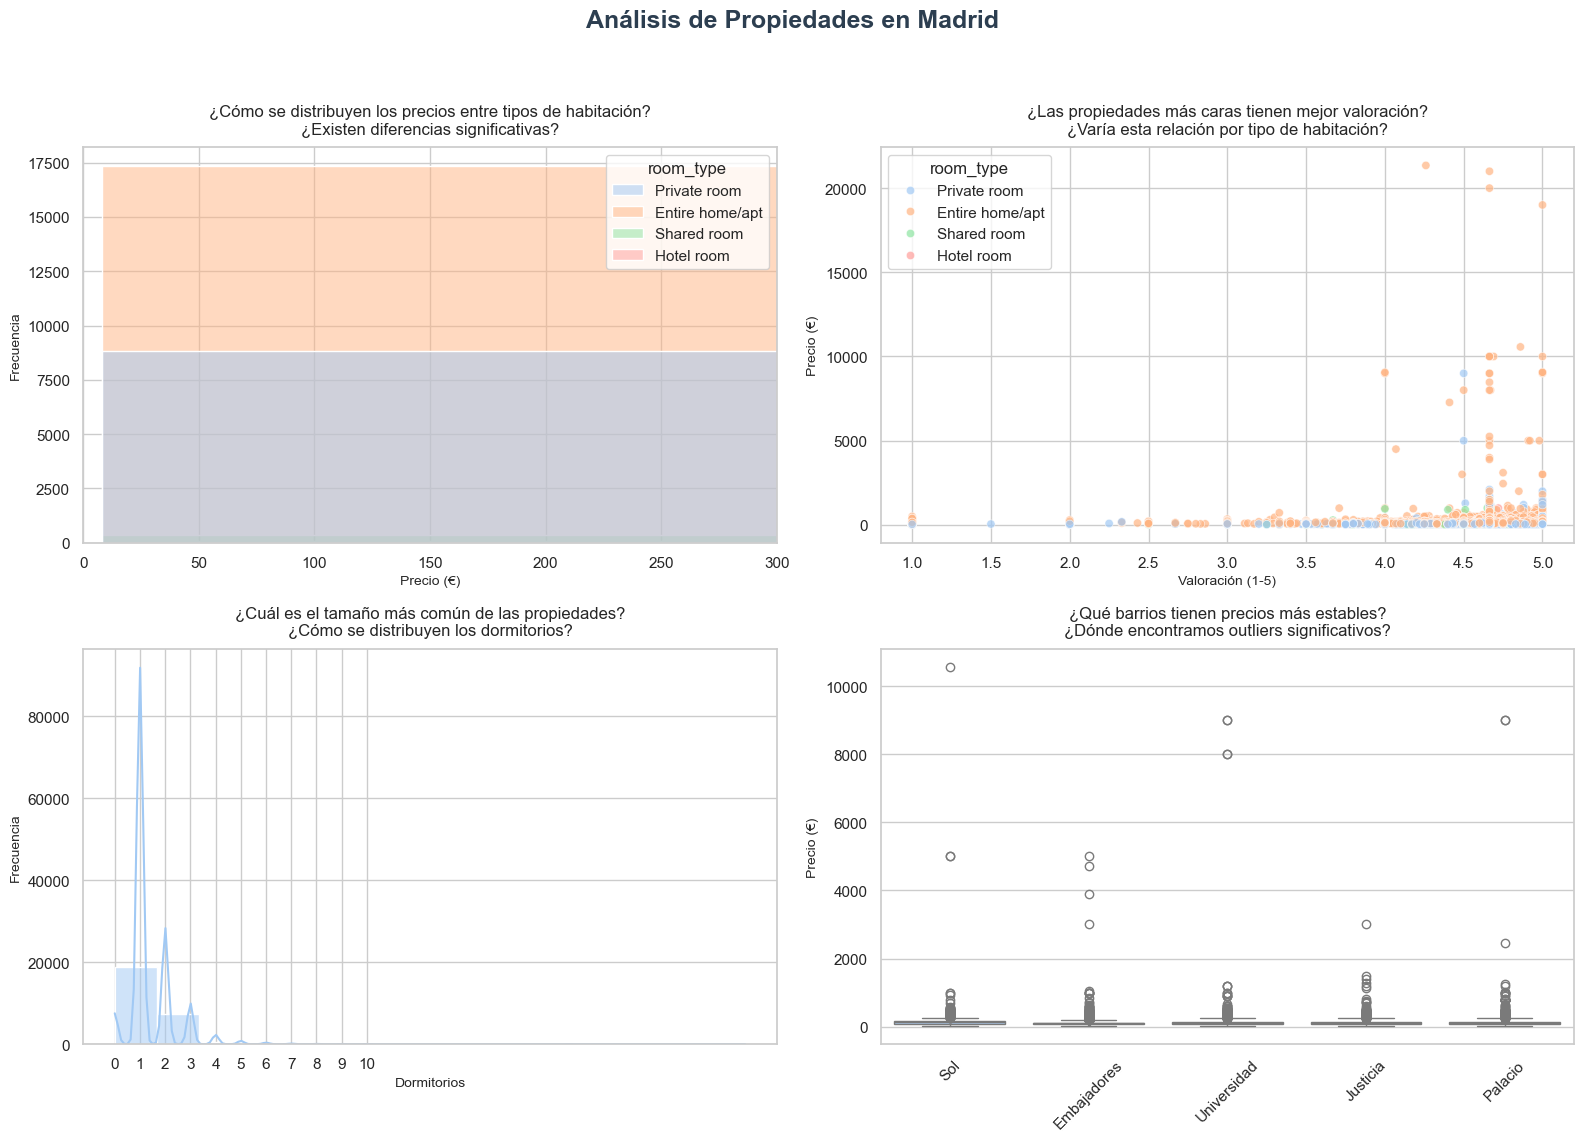

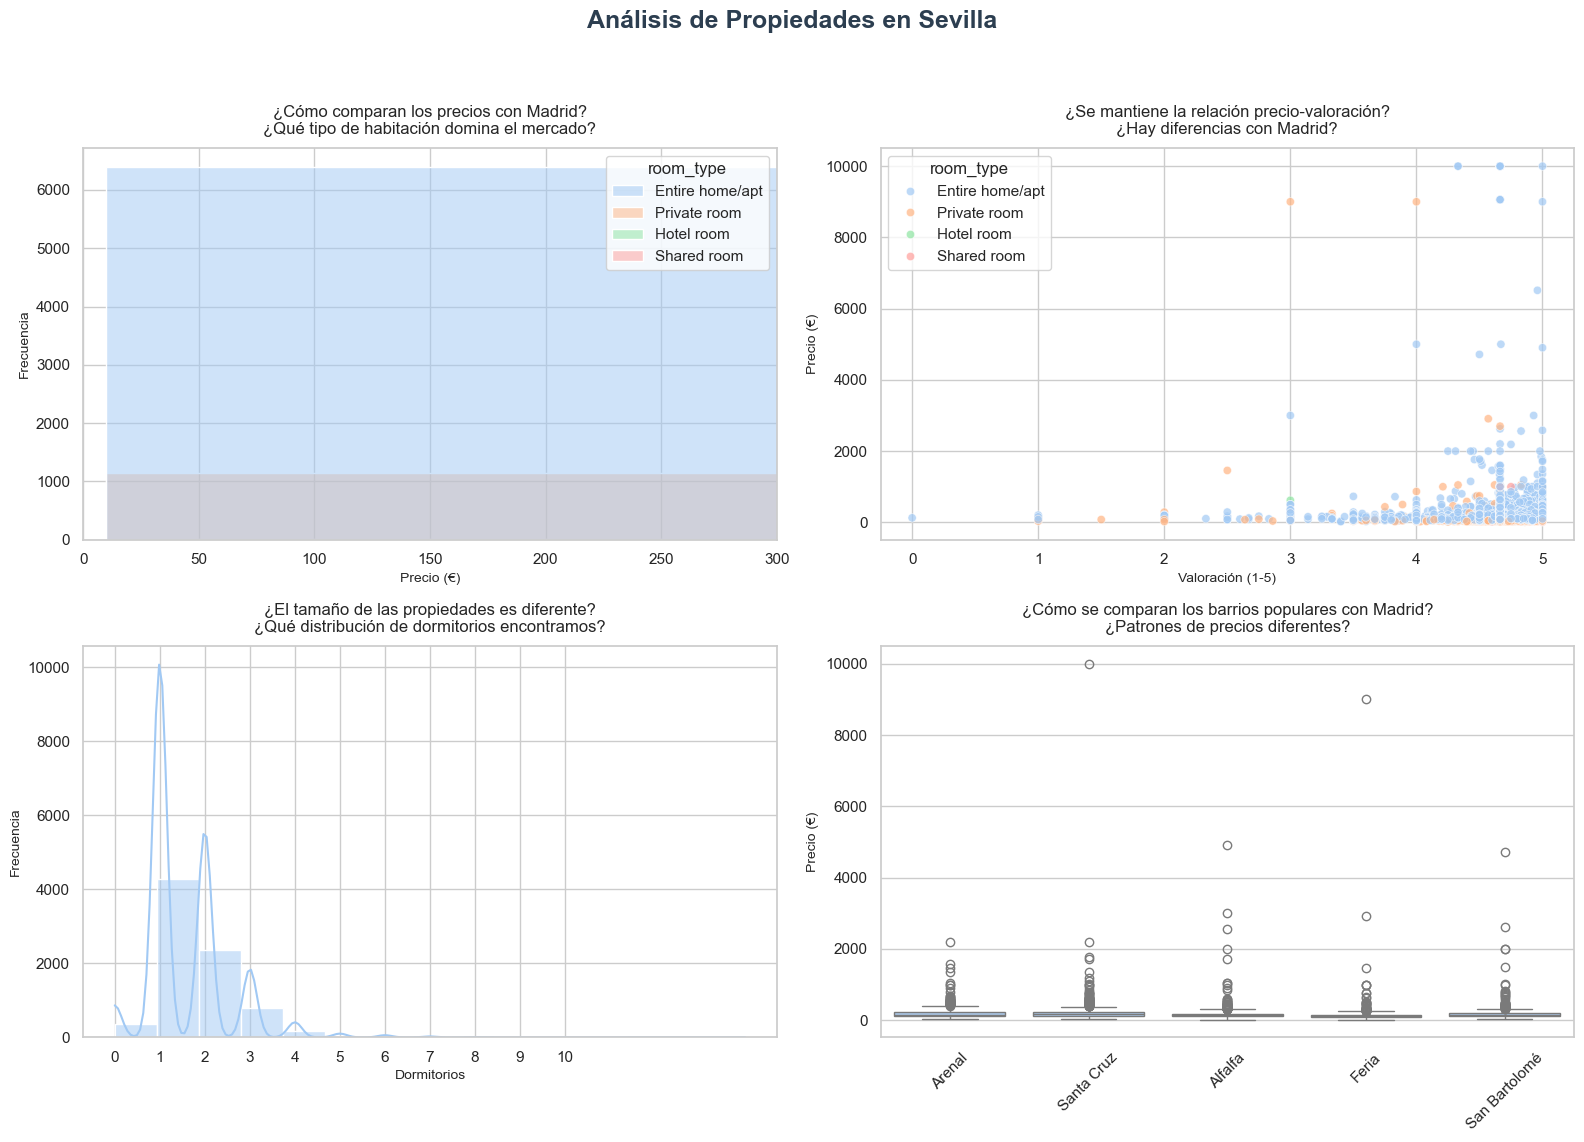

In [123]:
# Eliminar variable title si existe
if 'title' in globals():
    del title

# =========================================================================
# ANÁLISIS PARA MADRID
# =========================================================================
data_madrid = airbnb_variables_objetivos_limpio[airbnb_variables_objetivos_limpio['city'] == 'Madrid']

# Configuración de estilo
sns.set_theme(style="whitegrid", palette="pastel")
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Análisis de Propiedades en Madrid', fontsize=18, fontweight='bold', color='#2C3E50')

# 1. Distribución de Precios por Tipo de Habitación
sns.histplot(data=data_madrid,
             x='price',
             hue='room_type',
             bins=30,
             ax=axs[0, 0])
axs[0, 0].set_title('¿Cómo se distribuyen los precios entre tipos de habitación?\n¿Existen diferencias significativas?',
                   fontsize=12, pad=10)
axs[0, 0].set_xlabel('Precio (€)', fontsize=10)
axs[0, 0].set_ylabel('Frecuencia', fontsize=10)
axs[0, 0].set_xlim(0, 300)

# 2. Relación Precio-Valoración
sns.scatterplot(data=data_madrid,
                x='valoracion',
                y='price',
                hue='room_type',
                alpha=0.7,
                ax=axs[0, 1])
axs[0, 1].set_title('¿Las propiedades más caras tienen mejor valoración?\n¿Varía esta relación por tipo de habitación?',
                   fontsize=12, pad=10)
axs[0, 1].set_xlabel('Valoración (1-5)', fontsize=10)
axs[0, 1].set_ylabel('Precio (€)', fontsize=10)

# 3. Distribución de Dormitorios
sns.histplot(data=data_madrid,
             x='bedrooms',
             bins=15,
             kde=True,
             ax=axs[1, 0])
axs[1, 0].set_title('¿Cuál es el tamaño más común de las propiedades?\n¿Cómo se distribuyen los dormitorios?',
                   fontsize=12, pad=10)
axs[1, 0].set_xlabel('Dormitorios', fontsize=10)
axs[1, 0].set_ylabel('Frecuencia', fontsize=10)
axs[1, 0].set_xticks(range(0, 11))

# 4. Precios en Barrios Top
top_barrios_madrid = data_madrid['neighbourhood'].value_counts().index[:5]
sns.boxplot(data=data_madrid[data_madrid['neighbourhood'].isin(top_barrios_madrid)],
            x='neighbourhood',
            y='price',
            ax=axs[1, 1])
axs[1, 1].set_title('¿Qué barrios tienen precios más estables?\n¿Dónde encontramos outliers significativos?',
                   fontsize=12, pad=10)
axs[1, 1].set_xlabel('')
axs[1, 1].set_ylabel('Precio (€)', fontsize=10)
axs[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# =========================================================================
# ANÁLISIS PARA SEVILLA
# =========================================================================
data_sevilla = airbnb_variables_objetivos_limpio[airbnb_variables_objetivos_limpio['city'] == 'Sevilla']

fig, axs = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Análisis de Propiedades en Sevilla', fontsize=18, fontweight='bold', color='#2C3E50')

# 1. Distribución de Precios por Tipo de Habitación (Sevilla)
sns.histplot(data=data_sevilla,
             x='price',
             hue='room_type',
             bins=30,
             ax=axs[0, 0])
axs[0, 0].set_title('¿Cómo comparan los precios con Madrid?\n¿Qué tipo de habitación domina el mercado?',
                   fontsize=12, pad=10)
axs[0, 0].set_xlabel('Precio (€)', fontsize=10)
axs[0, 0].set_ylabel('Frecuencia', fontsize=10)
axs[0, 0].set_xlim(0, 300)

# 2. Relación Precio-Valoración (Sevilla)
sns.scatterplot(data=data_sevilla,
                x='valoracion',
                y='price',
                hue='room_type',
                alpha=0.7,
                ax=axs[0, 1])
axs[0, 1].set_title('¿Se mantiene la relación precio-valoración?\n¿Hay diferencias con Madrid?',
                   fontsize=12, pad=10)
axs[0, 1].set_xlabel('Valoración (1-5)', fontsize=10)
axs[0, 1].set_ylabel('Precio (€)', fontsize=10)

# 3. Distribución de Dormitorios (Sevilla)
sns.histplot(data=data_sevilla,
             x='bedrooms',
             bins=15,
             kde=True,
             ax=axs[1, 0])
axs[1, 0].set_title('¿El tamaño de las propiedades es diferente?\n¿Qué distribución de dormitorios encontramos?',
                   fontsize=12, pad=10)
axs[1, 0].set_xlabel('Dormitorios', fontsize=10)
axs[1, 0].set_ylabel('Frecuencia', fontsize=10)
axs[1, 0].set_xticks(range(0, 11))

# 4. Precios en Barrios Top (Sevilla)
top_barrios_sevilla = data_sevilla['neighbourhood'].value_counts().index[:5]
sns.boxplot(data=data_sevilla[data_sevilla['neighbourhood'].isin(top_barrios_sevilla)],
            x='neighbourhood',
            y='price',
            ax=axs[1, 1])
axs[1, 1].set_title('¿Cómo se comparan los barrios populares con Madrid?\n¿Patrones de precios diferentes?',
                   fontsize=12, pad=10)
axs[1, 1].set_xlabel('')
axs[1, 1].set_ylabel('Precio (€)', fontsize=10)
axs[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### precios medios por tipo de habitación y ciudad

Interpretación potencial:
- ¿Los apartamentos completos son significativamente más caros en Madrid?
- ¿Qué ciudad ofrece mejores precios en habitaciones compartidas?
- ¿Existe mayor variación de precios en algún tipo específico de alojamiento?

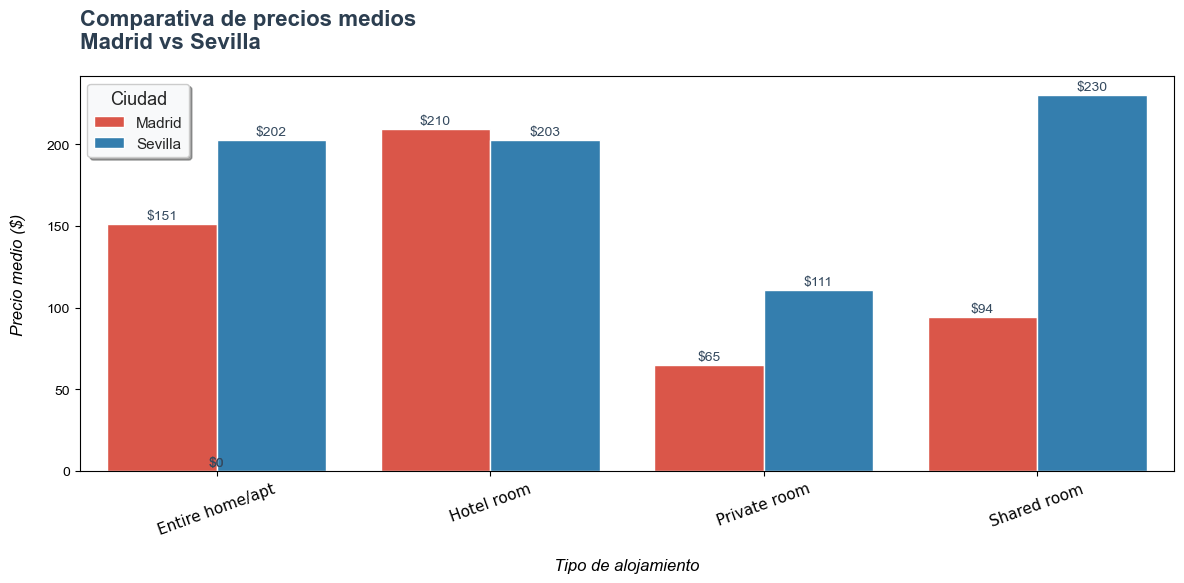

In [124]:
# ---------------------------------------------------------------
# PASO 1: LIMPIEZA DE VARIABLES (EJECUTAR ESTO PRIMERO)
# ---------------------------------------------------------------
import matplotlib.pyplot as plt

# Verificar y eliminar variables conflictivas
conflict_vars = ['title', 'Title', 'TITLE']
for var in conflict_vars:
    if var in globals():
        del globals()[var]
        print(f"Variable conflictiva '{var}' eliminada")

# Reiniciar configuración de matplotlib
plt.close('all')
plt.rcParams.update(plt.rcParamsDefault)

# ---------------------------------------------------------------
# PASO 2: CÓDIGO GRÁFICO CORREGIDO (EJECUTAR DESPUÉS DEL PASO 1)
# ---------------------------------------------------------------
import seaborn as sns

# Calcular precios medios
grouped = airbnb_variables_objetivos_limpio.groupby(['room_type', 'city'])['price'].mean().reset_index()

# Configurar figura
fig, ax = plt.subplots(figsize=(12, 6))
sns.set_theme(style="whitegrid", palette="pastel")

# Crear gráfico
ax = sns.barplot(
    x='room_type',
    y='price',
    hue='city',
    data=grouped,
    errorbar=None,
    palette={"Madrid": "#e74c3c", "Sevilla": "#2980b9"},
    saturation=0.85  # Intensidad de color aumentada
)

# Personalización avanzada
ax.set_title(
    'Comparativa de precios medios\nMadrid vs Sevilla',
    fontsize=16,
    pad=20,
    fontweight='bold',
    color='#2c3e50',
    loc='left'  # Alineación izquierda
)

ax.set_xlabel(
    'Tipo de alojamiento',
    fontsize=12,
    labelpad=15,
    fontstyle='italic'
)

ax.set_ylabel(
    'Precio medio ($)',
    fontsize=12,
    labelpad=15,
    fontstyle='italic'
)

# Rotación y formato de ejes
plt.xticks(
    rotation=20,
    fontsize=11,
    fontfamily='DejaVu Sans'  # Fuente más legible
)

# Etiquetas de valor mejoradas
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2.,
        p.get_height() + 5,  # Posición vertical ajustada
        f'${p.get_height():.0f}',
        ha='center',
        va='center',
        fontsize=10,
        color='#34495e'
    )

# Leyenda personalizada
leg = ax.legend(
    title='Ciudad',
    title_fontsize='13',
    fontsize=11,
    frameon=True,
    shadow=True,
    facecolor='#f8f9fa'  # Fondo claro
)

# Ajustes finales
plt.tight_layout()
plt.show()

## **Conversión del Dataset a Formato JSON**

✅ ¿Cómo validar que los archivos .json tienen estructura válida?
Para asegurarte de que los archivos .json estén bien estructurados y sean compatibles con MongoDB, debes cumplir con lo siguiente:

✔ Estructura válida JSON
Puedes validarlos en línea en herramientas como:

https://jsonlint.com/

https://jsonformatter.org/


✔ Compatible con MongoDB
MongoDB puede importar:

- Un JSON por línea (ndjson o JSONL)
- O un archivo con un array de objetos JSON, así:

```python
[
  { "nombre": "Juan", "edad": 30 },
  { "nombre": "Ana", "edad": 25 }
]
```
Recomendación: Usa el formato de array de objetos si vas a cargar con mongoimport.

In [125]:
# Información del dataset limpio
airbnb_variables_objetivos_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34793 entries, 0 to 34792
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              34793 non-null  int64  
 1   name                            34793 non-null  object 
 2   host_id                         34793 non-null  int64  
 3   host_name                       34790 non-null  object 
 4   neighbourhood_group             34793 non-null  object 
 5   neighbourhood                   34793 non-null  object 
 6   latitude                        34793 non-null  float64
 7   longitude                       34793 non-null  float64
 8   room_type                       34793 non-null  object 
 9   bedrooms                        34793 non-null  float64
 10  price                           34793 non-null  float64
 11  minimum_nights                  34793 non-null  int64  
 12  valoracion                      

Convertir los tipos de datos para estar compatible con MONGODB - Actividad BBDD Profesor Marlon

In [126]:
# Cambiar el tipo de datos para string

# Crea un nuevo dataframe para la actividad de BBDD Mongo y poder modificarlo
listing_madrid_servilla_clean = airbnb_variables_objetivos_limpio.copy()

# Identify numeric columns
numeric_columns = listing_madrid_servilla_clean.select_dtypes(include=['number']).columns

# Convert numeric columns to 'object' type
listing_madrid_servilla_clean[numeric_columns] = listing_madrid_servilla_clean[numeric_columns].astype(object)

print('Datos convertidos a string:', listing_madrid_servilla_clean.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34793 entries, 0 to 34792
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              34793 non-null  object
 1   name                            34793 non-null  object
 2   host_id                         34793 non-null  object
 3   host_name                       34790 non-null  object
 4   neighbourhood_group             34793 non-null  object
 5   neighbourhood                   34793 non-null  object
 6   latitude                        34793 non-null  object
 7   longitude                       34793 non-null  object
 8   room_type                       34793 non-null  object
 9   bedrooms                        34793 non-null  object
 10  price                           34793 non-null  object
 11  minimum_nights                  34793 non-null  object
 12  valoracion                      34793 non-null

Exportar datos por separado

In [127]:

#---------------------------------------------------------------------------------------------
# Separar los datos de listing para Madrid
#---------------------------------------------------------------------------------------------
# Separar el DataFrame en DataFrames para Madrid y Sevilla
listing_madrid_clean = airbnb_variables_objetivos_limpio[airbnb_variables_objetivos_limpio['city'] == 'Madrid'].copy()
# Generar los JSON
listing_madrid_clean.to_json('./JSON separados por ciudad/listing_madrid_clean.json', orient='records', force_ascii=False, indent=4)
calendar_madrid.to_json('./JSON separados por ciudad/calendar_sevilla.json', orient='records', force_ascii=False, indent=4)
reviews_madrid.to_json('./JSON separados por ciudad/reviews_madrid.json', orient='records', force_ascii=False, indent=4)
neighbournhood_madrid.to_json('./JSON separados por ciudad/neighbournhood_madrid.json', orient='records', force_ascii=False, indent=4)
neighbournhood_geojson_madrid.to_json('./JSON separados por ciudad/neighbournhood_geojson_madrid.json', orient='records', force_ascii=False, indent=4)

#---------------------------------------------------------------------------------------------
# Separar los datos de listing para Sevilla
#---------------------------------------------------------------------------------------------
listing_sevilla_clean = airbnb_variables_objetivos_limpio[airbnb_variables_objetivos_limpio['city'] == 'Sevilla'].copy()
# Generar los JSON
listing_sevilla_clean.to_json('./JSON separados por ciudad/listing_sevilla_clean.json', orient='records', force_ascii=False, indent=4)
calendar_sevilla.to_json('./JSON separados por ciudad/calendar_sevilla.json', orient='records', force_ascii=False, indent=4)
reviews_sevilla.to_json('./JSON separados por ciudad/reviews_sevilla.json', orient='records', force_ascii=False, indent=4)
neighbournhood_sevilla.to_json('./JSON separados por ciudad/neighbournhood_sevilla.json', orient='records', force_ascii=False, indent=4)
neighbournhood_geojson_sevilla.to_json('./JSON separados por ciudad/neighbournhood_geojson_sevilla.json', orient='records', force_ascii=False, indent=4)


#---------------------------------------------------------------------------------------------
# Obtener las columnas que faltan en el dataset listing_barcelona_clean cargo del JSON de Guillermo
#---------------------------------------------------------------------------------------------
# Cargar el archivo JSON  de Barcelona que Guillermo ha enviado en un nuevo DataFrame
listing_barcelona_clean = pd.read_json("./JSON separados por ciudad/listings_clean_2.json")
listing_barcelona_clean['city'] = 'Barcelona'
# Generar los JSON
listing_barcelona_clean.to_json('./JSON separados por ciudad/listing_barcelona_clean.json', orient='records', force_ascii=False, indent=4)
calendar_barcelona.to_json('./JSON separados por ciudad/calendar_barcelona.json', orient='records', force_ascii=False, indent=4)
reviews_barcelona.to_json('./JSON separados por ciudad/reviews_barcelona.json', orient='records', force_ascii=False, indent=4)
neighbournhood_barcelona.to_json('./JSON separados por ciudad/neighbournhood_barcelona.json', orient='records', force_ascii=False, indent=4)
neighbournhood_geojson_barcelona.to_json('./JSON separados por ciudad/neighbournhood_geojson_barcelona.json', orient='records', force_ascii=False, indent=4)


#neighbournhood_geojson_barcelona.to_json('./JSON separados por ciudad/neighbournhood_geojson_barcelona.json', orient='records', force_ascii=False, indent=4)

In [128]:
# Verificar los nuevos DataFrames
print("listing_madrid_clean shape:", listing_madrid_clean.shape)
print("listing_sevilla_clean shape:", listing_sevilla_clean.shape)
print("listing_barcelona_clean shape:", listing_barcelona_clean.shape)
print("Madrid value counts:\n",listing_madrid_clean['city'].value_counts())
print("Sevilla value counts:\n",listing_sevilla_clean['city'].value_counts())
print("Sevilla value counts:\n",listing_barcelona_clean['city'].value_counts())

listing_madrid_clean shape: (26760, 21)
listing_sevilla_clean shape: (8033, 21)
listing_barcelona_clean shape: (19422, 19)
Madrid value counts:
 city
Madrid    26760
Name: count, dtype: int64
Sevilla value counts:
 city
Sevilla    8033
Name: count, dtype: int64
Sevilla value counts:
 city
Barcelona    19422
Name: count, dtype: int64


In [129]:
# Limitar la cantidad de filas a 10 filas para evitar que los archivos .json sean demasiado grandes
airbnb_madrid_y_servilla_limited = airbnb_variables_objetivos_limpio.head(10)

# Dataframe airbnb_variables_objetivos_limpio completo
airbnb_madrid_y_servilla_completo = airbnb_variables_objetivos_limpio.copy()


In [130]:
# Enviar todo el contenido del Dataframe a un archivo .json (No se limita la cantidad de filas)
#alojamientos_turisticos.to_json('airbnb_variables_objetivos_limpio.json', orient='records', force_ascii=False, indent=4)

airbnb_madrid_y_servilla_limited.to_json('airbnb_madrid_y_sevilla_limited.json', orient='records', force_ascii=False, indent=4)
airbnb_madrid_y_servilla_completo.to_json('airbnb_madrid_y_sevilla_completo.json', orient='records', force_ascii=False, indent=4)